## Boost 
* Credit Card Fraud Detection
---

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import my_utils as my

#### 데이터 준비

In [2]:
data = pd.read_csv("../data/creditcard.csv")
data.shape

(284807, 31)

In [3]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df = data.copy()

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
df["Class"].value_counts()

0    284315
1       492
Name: Class, dtype: int64

<AxesSubplot: xlabel='Class', ylabel='count'>

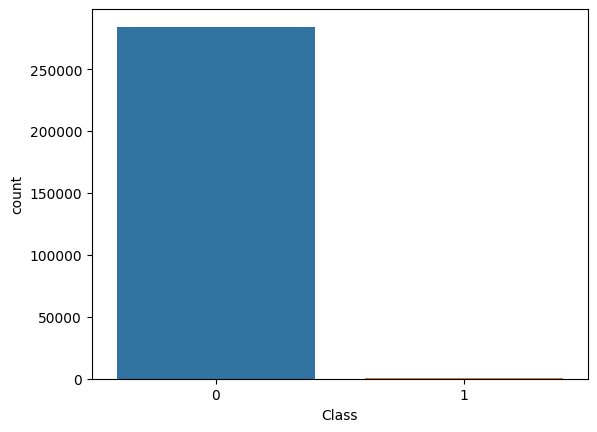

In [8]:
sns.countplot(x=df["Class"])

In [9]:
x = df.drop(["Time", "Class"], axis=1)
x.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99


In [10]:
y = df["Class"]
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Class, dtype: int64

In [12]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=1)
print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)

(227845, 29) (56962, 29)
(227845,) (56962,)


In [20]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
tmp = x_train["Amount"].values.reshape(-1, 1)
tmp = ss.fit_transform(tmp)
x_train["Amount"] = tmp

In [25]:
tmp2 = x_test["Amount"].values.reshape(-1, 1)
tmp2 = ss.transform(tmp2)
x_test["Amount"] = tmp2

y_train = y_train.values
y_test= y_test.values

In [21]:
x_train["Amount"]

9341     -0.119625
210529    0.214341
51525    -0.322844
128333   -0.194817
252025   -0.294807
            ...   
249626   -0.156181
188363   -0.138823
224660   -0.323204
206178   -0.320204
99525     0.700811
Name: Amount, Length: 227845, dtype: float64

In [22]:
# Robust Scaler
# from sklearn.preprocessing import RobustScaler

# rs = RobustScaler()
# x_train["Amount"] = rs.fit_trainsform(x_train["Amount"].values.reshape(-1, 1))

In [23]:
x_train.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
9341,1.148607,-0.004154,-0.231106,1.124256,0.696077,1.177523,-0.160142,0.201478,1.568269,-0.320290,...,-0.122816,-0.294334,-0.550620,-0.309693,-1.773489,0.791006,-0.263954,-0.008489,-0.011284,-0.119625
210529,-0.910538,-0.971254,1.033829,-1.514111,-1.068542,0.148626,-0.660712,0.694582,-0.563151,-0.396853,...,0.362532,0.183422,0.082033,0.245169,-0.347895,-0.046626,-0.366928,-0.130325,-0.161839,0.214341
51525,1.222501,0.491904,-0.082522,0.987913,0.164676,-0.845453,0.515114,-0.258261,-0.667442,0.186485,...,-0.076698,0.068123,0.244725,-0.173798,0.373883,0.849200,-0.317268,-0.007417,0.003691,-0.322844
128333,1.184303,-0.066290,0.400333,-0.048278,-0.447460,-0.521259,-0.103204,-0.044640,-0.032670,-0.048690,...,0.041195,-0.268415,-0.900138,0.112504,0.032476,0.046804,0.472132,-0.068010,0.008341,-0.194817
252025,-0.484059,0.439377,-2.033102,-3.398765,2.209264,3.175789,-0.566306,0.423994,-1.281704,0.137172,...,-0.171988,1.344784,1.271853,0.055813,0.735276,-0.629507,-0.178298,0.394319,0.240147,-0.294807


In [26]:
x_test.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
32255,1.143676,-0.171978,1.237362,0.873063,-1.047431,-0.279318,-0.550681,0.028027,0.821509,-0.270137,...,-0.014884,-0.071636,-0.022851,0.005727,0.454436,0.271051,0.311897,0.017754,0.032307,-0.239812
171386,1.907730,-0.036936,-1.956628,0.397331,0.366717,-0.967145,0.268785,-0.249648,0.327864,-0.380187,...,-0.031469,0.259187,0.740099,-0.145026,-0.472334,0.253968,-0.104448,-0.017707,-0.030692,-0.064791
198944,-0.790452,0.283243,1.027728,-0.407375,1.455679,5.596155,-2.187891,-0.908526,1.156964,-0.681162,...,-0.571662,2.351712,-0.462717,-0.641773,0.708122,1.614838,-0.242104,0.312321,0.165323,-0.148022
203157,2.073675,0.089413,-1.709240,0.434341,0.310710,-0.924093,0.116996,-0.181403,0.643899,-0.348321,...,-0.223121,-0.374555,-1.020429,0.356653,0.540546,-0.296108,0.173093,-0.069053,-0.032430,-0.351241
49766,-3.022721,2.554556,-1.638564,-2.870878,1.322196,2.948135,-0.616557,1.683751,1.621315,2.136942,...,1.182692,-0.452205,-0.715412,0.101042,0.990957,0.361458,0.701487,0.256053,-0.252476,-0.337122


In [27]:
# !pip install imbalanced-learn

     -------------------------------------- 226.0/226.0 kB 7.0 MB/s eta 0:00:00


In [28]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(k_neighbors=5)
x_train_o, y_train_o = smote.fit_resample(x_train, y_train)

In [31]:
y_train_o.value_counts()

AttributeError: 'numpy.ndarray' object has no attribute 'value_counts'

In [35]:
# !pip install xgboost

In [36]:
%%time
from xgboost import XGBClassifier

clf = XGBClassifier(n_estimators=300, max_depth=4, learning_rate=0.1, random_state=1)
clf.fit(x_train_o, y_train_o)

CPU times: total: 14min 58s
Wall time: 1min 57s


XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.1, max_bin=256,
              max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
              max_depth=4, max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=300, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=1, ...)

#### 테스트

In [38]:
y_pred = clf.predict(x_test)
my.print_score(y_test, y_pred)

accuracy : 0.9976826656367402
precision : 0.41904761904761906
recall : 0.8979591836734694


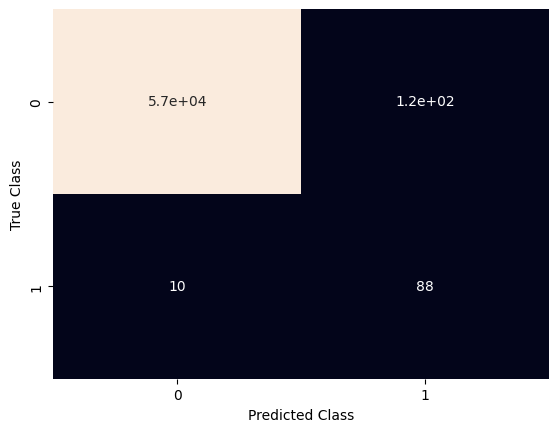

In [39]:
my.plot_confusion_matrix(y_test, y_pred)

In [45]:
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_test, y_pred):
    cfm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cfm, annot=True, cbar=False, fmt="d")
    plt.xlabel("Predicted Class")
    plt.ylabel("True Class")
    plt.show()

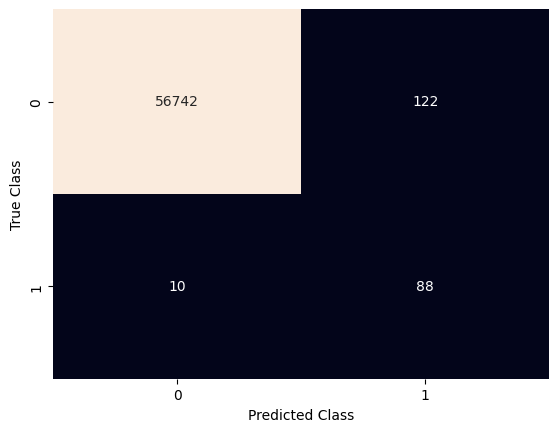

In [46]:
plot_confusion_matrix(y_test, y_pred)

#### LightGBM

In [47]:
# https://lightgbm.readthedocs.io/en/v3.3.2/
# !pip install lightgbm

     ---------------------------------------- 1.0/1.0 MB 9.2 MB/s eta 0:00:00


In [48]:
%%time

from lightgbm import LGBMClassifier

clf = LGBMClassifier(n_estimators=300, max_depth=4, learning_rate=0.1, random_state=1)
clf.fit(x_train_o, y_train_o)

CPU times: total: 21.8 s
Wall time: 3.34 s


LGBMClassifier(max_depth=4, n_estimators=300, random_state=1)

In [49]:
y_pred = clf.predict(x_test)
my.print_score(y_test, y_pred)

accuracy : 0.9976299989466662
precision : 0.41232227488151657
recall : 0.8877551020408163


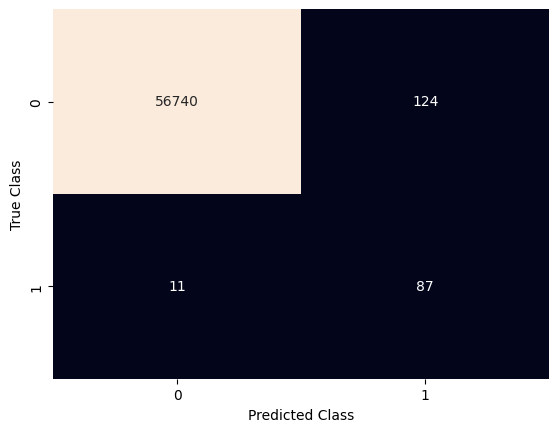

In [50]:
plot_confusion_matrix(y_test, y_pred)

#### RandomForest

In [51]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=30, max_depth=3)
clf.fit(x_train_o, y_train_o)

RandomForestClassifier(max_depth=3, n_estimators=30)

In [52]:
y_pred = clf.predict(x_test)
my.print_score(y_test, y_pred)

accuracy : 0.9917313296583687
precision : 0.16152450090744103
recall : 0.9081632653061225


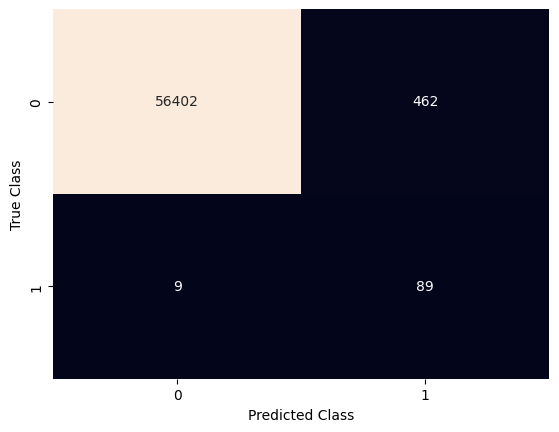

In [53]:
plot_confusion_matrix(y_test, y_pred)